In [4]:
import torch
# from torchvision.models import convnext_base, ConvNeXt_Base_Weights
# from torchvision.models.feature_extraction import get_graph_node_names
# from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.datasets import MNIST
from tqdm import tqdm
from torch.utils.data.distributed import DistributedSampler
from torch.utils.data import DataLoader, SequentialSampler

import matplotlib.pyplot as plt


import pickle
import os

import numpy as np
# from sklearn.decomposition import PCA

import sys
sys.path.append("..")
from src.image_data import ImageClassificationDataset
from src.quantize import cluster_feat

In [5]:
DATASET = "mnist"
DATA_PATH = f'/mnt/ssd/ronak/datasets/{DATASET}'
root = DATA_PATH

### Download and View Data

In [6]:
train_data = MNIST(root, download=True, train=True)
test_data = MNIST(root, download=True, train=False)

In [8]:
x = train_data.data
y = np.array(train_data.targets)

print(x.shape)
print(y.shape)

torch.Size([60000, 28, 28])
(60000,)


In [10]:
x_train = np.array(train_data.data)
y_train = np.array(train_data.targets)
x_test =  np.array(test_data.data)
y_test = np.array(test_data.targets)

print(x_train[0, :, :])
print(x_train.shape)
print(y_train.shape)
print(len(np.unique(y_train)))

np.save(os.path.join(root, "x_train.npy"), x_train)
np.save(os.path.join(root, "y_train.npy"), y_train)
np.save(os.path.join(root, "x_test.npy"), x_test)
np.save(os.path.join(root, "y_test.npy"), y_test)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

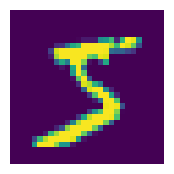

In [11]:
image = x_train[0]

fig, ax = plt.subplots(figsize=(2, 2))
ax.axis("off")
ax.imshow(image)
plt.show()